The first 5 values of data is 
     Outlook Temperature Humidity  Windy PlayTennis
0     Sunny         Hot     High  False         No
1     Sunny         Hot     High   True         No
2  Overcast         Hot     High  False        Yes
3     Rainy        Mild     High  False        Yes
4     Rainy        Cool   Normal  False        Yes

The first 5 values of Train data is 
     Outlook Temperature Humidity  Windy
0     Sunny         Hot     High  False
1     Sunny         Hot     High   True
2  Overcast         Hot     High  False
3     Rainy        Mild     High  False
4     Rainy        Cool   Normal  False

The first 5 values of Train output is 
 0     No
1     No
2    Yes
3    Yes
4    Yes
Name: PlayTennis, dtype: object

Now the Train data is
    Outlook  Temperature  Humidity  Windy
0        2            1         0      0
1        2            1         0      1
2        0            1         0      0
3        1            2         0      0
4        1            0         1   

C:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


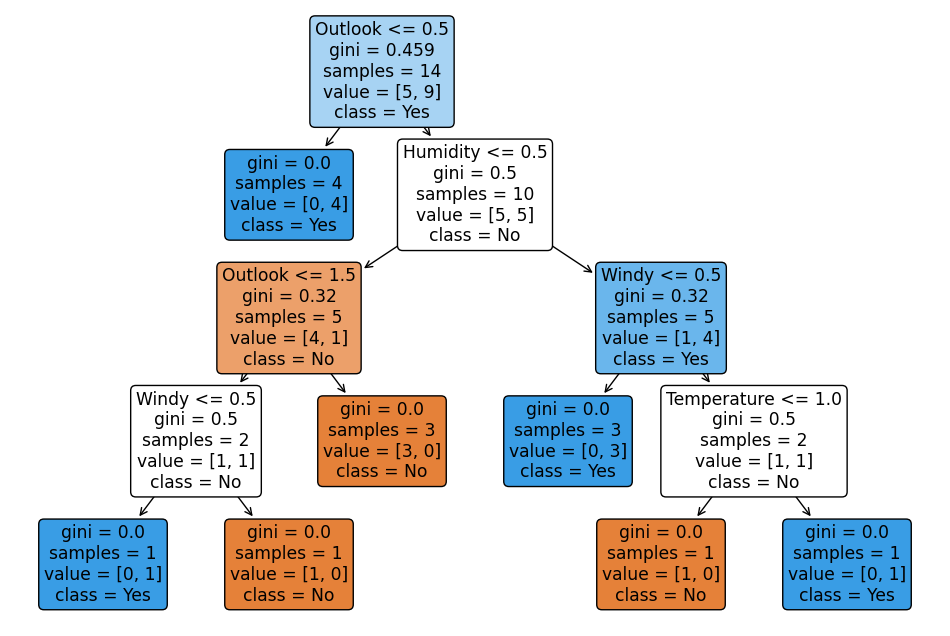

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from io import StringIO
import matplotlib.pyplot as plt

# Load data from CSV
data = pd.read_csv('tennisdata.csv')
print("The first 5 values of data is \n", data.head())

# Obtain Train data and Train output
X = data.iloc[:, :-1]
print("\nThe first 5 values of Train data is \n", X.head())
y = data.iloc[:, -1]
print("\nThe first 5 values of Train output is \n", y.head())

# Convert them into numbers
le_outlook = LabelEncoder()
X.Outlook = le_outlook.fit_transform(X.Outlook)

le_Temperature = LabelEncoder()
X.Temperature = le_Temperature.fit_transform(X.Temperature)

le_Humidity = LabelEncoder()
X.Humidity = le_Humidity.fit_transform(X.Humidity)

le_Windy = LabelEncoder()
X.Windy = le_Windy.fit_transform(X.Windy.astype(str))

print("\nNow the Train data is\n", X.head())

le_PlayTennis = LabelEncoder()
y = le_PlayTennis.fit_transform(y)
print("\nNow the Train data is\n", y)

## Train model
classifier = DecisionTreeClassifier()
classifier.fit(X, y)

def labelEncoderForInput(list1):
    transformed_list = [
        le_outlook.transform([list1[0]])[0],
        le_Temperature.transform([list1[1]])[0],
        le_Humidity.transform([list1[2]])[0],
        le_Windy.transform([list1[3]])[0]
    ]
    return transformed_list

## predict for an input
inp = ["Sunny", "Hot", "High", "False"]
inp1 = ["Rainy", "Mild", "High", "False"]
pred1 = labelEncoderForInput(inp1)
y_pred = classifier.predict([pred1])

print("\nFor input {0}, we obtain {1}".format(inp1, le_PlayTennis.inverse_transform(y_pred)[0]))

plt.figure(figsize=(12, 8))
tree.plot_tree(classifier, filled=True, feature_names=list(X.columns), class_names=list(le_PlayTennis.classes_), rounded=True)
plt.show()